# L1.2 Regresión lineal simple

En esta lectura generaremos nuestro primer modelo de regresión lineal, codificando ecuación por ecuación cada paso necesario. Haciendo esto, encontraremos los coeficientes óptimos y graficaremos la respuesta del modelo. También interpretaremos los resultados del modelo: revisaremos si el modelo es adecuado, si la variable de entrada realmente está asociada con la respuesta del sistema, etc. Calcularemos el error estándar y los intervalos de confianza de $\beta_1$, analizaremos si la asociación es significativa a través del *p-value* asociado al estadístico t, y calcularemos el *residual standard error* y el $R^2$. Finalmente, usaremos una función para descubrir lo sencillo que es obtener estas métricas usando librerías de análisis de datos.

Por favor no modifiques las celdas con las instrucciones, y solamente escribe código en las celdas donde así se te indica. **Si en algún momento seleccionas por error una celda de instrucciones y su apariencia cambia, simplemente presiona "Ctrl + Enter".**

Dentro de las celdas de código, las líneas que inician con un "\#" son comentarios y no se ejecutarán, simplemente sirven como instrucciones o descripciones útiles para ustedes.

En esta lectura trabajaremos con la tasa de natalidad en México de 2010 a 2021. Dicha información se extrajo directamente del [INEGI](https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=Natalidad_Natalidad_01_97690dcd-1099-4e34-ba7f-1180912653bb). Los datos los puedes encontrar en la plataforma del curso, el archivo lleva por nombre "L1.2 Natalidad.csv". En nuestra primera celda de código importaremos el archivo y revisaremos las primeras filas del mismo, recuerda usar la función `read_csv()` de panda para leer el archivo, y la función `head()` para desplegar la información de interés. No olvides que para usar una función de pandas, primero debes importar dicha librería.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import pandas as pd<br>
    df=pd.read_csv("Natalidad.csv")<br>
    print(df.head())
</details>

In [27]:
# Se importa la librería pandas, usando el término "pd" como sinónimo
import pandas as pd
# Se leen los datos
df = pd.read_csv("L1.2 Natalidad.csv", encoding="latin1")
# Se imprimen las primeras 5 filas de los datos en la consola
print(df.head(5))

    Año  Natalidad
0  2010    2643908
1  2011    2586287
2  2012    2498880
3  2013    2478889
4  2014    2463420


A partir de este punto, será conveniente llamar a nuestras variables como `x` y `y`. Ya que la variable de interés en este caso es la natalidad, esa será nuestra respuesta, mientras que el año será el dato de entrada. Para que los números con los que trabajemos no se sientan tan exageradamente grandes, dividiremos la natalidad entre 1000, por lo que nuestra respuesta tendrá unidades de miles de nacimientos. En la siguiente celda, simplemente define una variable de nombre `x` en donde se guarde la información del año, y una variable de nombre `y` en donde se guarde la información de natalidad dividida entre 1000.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    x = df.Ano<br>
    y = df.Natalidad/1000
</details>

In [28]:
# Define x
x = df.Año
# Define y
y = df.Natalidad/1000

Antes de generar un modelo de regresión lineal, observemos nuestros datos para verificar si su relación aparenta tener una forma lineal. Usaremos la misma función mágica que usamos en la lectura anterior, de forma que las gráficas se visualicen de forma adecuada en nuestra *Jupyter Notebook*. Posteriormente, generaremos una gráfica de dispersión con la función `scatter()` de matplotlib.pyplot, por lo que también deberemos importar dicha librería. En esta ocasión, también nos interesa que los ejes estén etiquetados de forma clara. Lograremos esto con las funciones `ylabel()`y `xlabel()` de la misma librería. Finalmente, desplegaremos la gráfica en la consola con la función `show()`<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    %matplotlib inline<br>
    import matplotlib.pyplot as plt<br>
    plt.scatter(x, y)<br>
    plt.ylabel("Nacimientos anuales en México [en miles]")<br>
    plt.xlabel("Año")<br>
    plt.show()
</details>

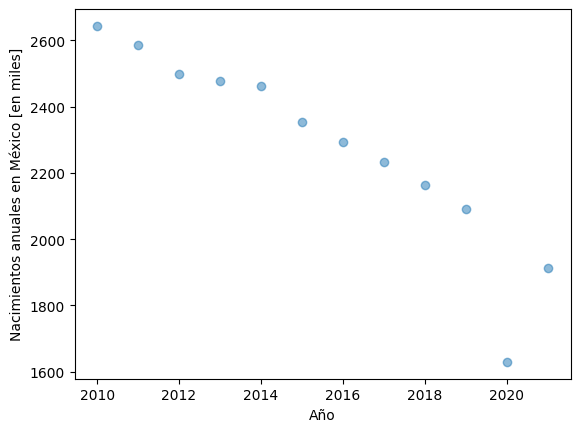

In [29]:
# Agrega la función mágica
%matplotlib inline
# Importa la librería matplotlib.pyplot, usando plt como sinónimo
import matplotlib.pyplot as plt
# Usa la función scatter para generar una gráfica de dispersión
plt.scatter(x, y, alpha = 0.5)
# Etiqueta el eje y con el texto "Nacimientos anuales en México [en miles]"
plt.ylabel("Nacimientos anuales en México [en miles]")
# Etiqueta el eje x con el texto "Año"
plt.xlabel("Año")
# Muestra la gráfica usando la función show
plt.show()

Llegó el momento de calcular los coeficientes óptimos para nuestro modelo. Para lograrlo, usaremos las ecuaciones revisadas en clase. Para no terminar con una línea de código muy extensa, proclive a error humano, dividiremos la ecuación de $\beta_1$ en dos partes: el numerador y el denominador. Ya que necesitamos utilizar el promedio tanto de `x` como de `y`, primero generaremos un par de variables de nombre `xBar` y `yBar` donde almacenaremos esa información. Para lograrlo, usaremos la función `mean` de pandas, por lo que primero importaremos dicha librería.

Posteriormente calcularemos el numerador `B1num` y denominador `B1den` de $\beta_1$ de forma independiente, recordando usar la función `sum` para obtener la sumatoria de los términos. También es importante mencionar que la potencia de un valor se calcula con el operador `**`, por ejemplo: $3^2$ se escribe como `3**2`. Después definiremos una variable de nombre `B1` como la división de `B1num` entre `B1den`, y una variable de nombre `B0` de acuerdo a lo que indica la ecuación vista en clase. Finalmente, imprimiremos el valor de cada coeficiente en la consola con dos llamadas a la función `print`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import numpy as np<br>
    xBar = np.mean(x)<br>
    yBar = np.mean(y)<br>
    B1num = sum((x-xBar)*(y-yBar))<br>
    B1den = sum((x-xBar)**2)<br>
    B1 = B1num / B1den<br>
    B0 = yBar - (B1*xBar)<br>
    print("B0 =",B0)<br>
    print("B1 =",B1)
</details>


In [30]:
# Importa numpy usando np como sinónimo
import numpy as np
# Calcula el promerio de x
xBar = np.mean(x)
# Calcula el promedio de y
yBar = np.mean(y)
# Calcula el numerador de B1 apoyándote de la función sum
B1num = sum((x-xBar)*(y-yBar))
# Calcula el denominador de B1 apoyándote de la función sum
B1den = sum((x-xBar)**2)
# Calcula B1 como la proporción entre el numerador y el denominador
B1 = B1num / B1den
# Calcula B0
B0 = yBar - (B1*xBar)
# Imprime el valor de B0
print("B0 =",B0)
# Imprime el valor de B1
print("B1 =",B1)

B0 = 156184.1813263403
B1 = -76.36075874125873


Revisemos si los resultados obtenidos hacen sentido, al menos de forma cualitativa, graficando la línea que representa a nuestro modelo, sobreponiéndola en la gráfica original que mostraba los datos. Primero  replicaremos la misma gráfica que generamos previamente, pero sin usar la función `show` aún. La función mágica tampoco necesita repetirse, una vez que se ejecutó en alguna celda, el comportamiento se mantiene en todo el documento. Asimismo, tampoco es necesario volver a importar la librería.

Después generemos una variable que denote el valor de Y que el modelo estima. La llamaremos `yHat`, y la calcularemos usando las variables `B0` y `B1`, recordando que nuestra ecuación lineal tiene la forma $y = \beta_0 + \beta_1 x$. Debajo de estas líneas de código usaremos la función `plot` para generar la línea, definiendo el parámetro de color `c` con valor `"r"`, el de ancho de línea `linewidth` con valor 3, y el de transparencia `alpha` con valor 0.5. Finalmente, usaremos la función `show` para mostrar la gráfica.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    plt.scatter(x, y)<br>
    plt.ylabel("Nacimientos anuales en México [en miles]")<br>
    plt.xlabel("Año")<br>
    yHat = B0 + B1*x<br>
    plt.plot(x, yHat, c = "r", linewidth = 3, alpha = 0.5)<br>
    plt.show()
</details>

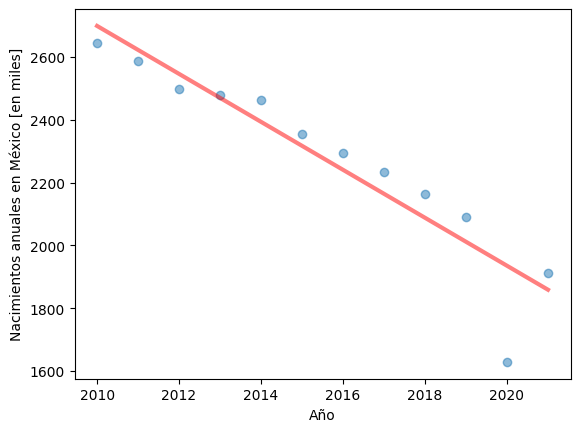

In [31]:
# Código para replicar la gráfica anterior

plt.scatter(x, y, alpha = 0.5)
plt.ylabel("Nacimientos anuales en México [en miles]")
plt.xlabel("Año")

# Usando x, B0, y B1, guarda el valor de Y estimada en una variable de nombre yHat
yHat = B0 + B1*x
# Agrega la línea que representa al modelo con la función plot
plt.plot(x, yHat, c="r", linewidth=3, alpha=0.5)
# Muestra la gráfica usando la función show
plt.show()

Ahora revisemos una de las métrica de error sobre las que aprendimos en este módulo, el *residual sum of squares* (RSS). Calcula el RSS y almacena el resultado en una variable de nombre `RSS` de acuerdo a las ecuaciones vistas en clase. Para este punto, nuestro ambiente de trabajo ya cuenta con una variable de nombre `yHat` que almacena el valor de Y estimado por nuestro modelo, lo que nos será muy útil para realizar este cálculo. Por último, imprimiremos en consola el valor calculado de RSS.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    RSS = sum((y - yHat)**2)<br>
    print("RSS =", RSS)<br>
</details>

In [32]:
# Calcula el RSS haciendo uso de la función "sum" y el operador "**"
RSS = sum((y-yHat)**2)
# Imprime el valor de RSS
print("RSS =", RSS)

RSS = 129108.19682658643


Ahora calculemos el error estándar. Primero, genera una variable de nombre `n` en donde se almacene la cantidad de observaciones en nuestro estudio. Esta información la puedes generar con la función `len`. Para este punto, nuestro ambiente de trabajo ya cuenta con una variable de nombre `RSS`, el *residual sum of squares*; dicha variable nos será muy útil para realizar este cálculo. Calcularemos el error estándar de $\beta_1$ con la ecuación vista en clase, almacenando el resultado en una variable de nombre `SEB1`. La raíz cuadrada la puedes calcular con la función `sqrt` de numpy; no necesitas volver a importar dicha librería. Por último, imprimiremos en consola el valor calculado del error estándar de $\beta_1$.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    n = len(x)<br>
    SEB1 = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))<br>
    print(SEB1)
</details>

In [ ]:
# Almacena en una variable de nombre "n" la cantidad de observaciones
n=len(x)
# Calcula el error estándar de B1 apoyándode de la función "sqrt" de numpy
SEB1 = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))
# Imprime el valor de SEB1
print(SEB1)

9.501865728702137


El resultado anterior lo podemos interpretar como: "el coeficiente que estimamos está en promedio a 9.5 unidades de distancia de su valor óptimo". Dependiendo del motivo de nuestro análisis, tomaríamos la decisión de si ese error es permisible o no. Por otro lado, si deseamos dar un resultado más robusto sobre la relación directa entre la variable de entrada y la de salida, podemos calcular el intervalo de confianza de $\beta_1$. Previamente descubrimos que el valor de dicho coeficiente es de -76.36, es decir, se espera un decremeno de aproximadamente 76 mil nacimientos cada año. Revisemo qué nos dice el intervalo de confianza en este caso.

Primero calcularemos el percentil 97.5 (o 2.5) de una distribución t de *Student* con $n - 2$ grados de libertad. La manera más sencilla de calcularlo es con la función `t.interval` de la librería scipy.stats, por lo que primero importaremos dicha librería. La función en cuestión tendrá como parámetros `alpha`, el nivel de confianza, con un valor de 0.95, y `df`, los grados de libertad, con un valor de $n-2$. Almacena el resultado en una variable de nombre `per`. Como resultado, dicha función te entrega un arreglo con dos valores, el percentil 2.5 y el percentil 97.5. En este caso, nos quedaremos con el segundo, por lo que al final de la función agregaremos el término `[1]` que denota que seleccionaremos el segundo elemento del arreglo (Python empieza a contar desde 0).

Una vez calculado dicho valor, podemos obtener el intervalo de confianza a partir de las ecuaciones vistas en clase. Almacena el límite inferior en una variable de nombre `CIlow` y el límite superior en una variable de nombre `CIhigh`. Finalmente, imprime en consola el intervalo de confianza del 95%.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import scipy.stats as st<br>
    per = st.t.interval(alpha = 0.95, df = n-2)[1]<br>
    CIlow = B1 - per*SEB1<br>
    CIhigh = B1 + per*SEB1<br>
    print("Inervalo de confianza: (",CIlow,",",CIhigh,")")
</details>

In [ ]:
# Importa la librería scipy.stats con sinónimo st
import scipy.stats as st
# Calcula el percentil 97.5 con la función "t.interval"
per = st.t.interval(0.95, n-2)[1]
# Calcula el límite inferior
CIlow = B1 - per * SEB1
# Calcula el límite superios
CIhigh = B1 + per * SEB1
# Imprime el intervalo de confianza
print("Intervalo de confianza: (",CIlow,",",CIhigh,")")

Inervalo de confianza: ( -97.53223493753411 , -55.18928254498336 )


Como podrás ver, ahora podemos reportar de manera más robusta que existe un 95% de probabilidad de que el decremento anual de la natalidad en México esté entre 55 mil y 97 mil nacimientos.

El siguiente paso de nuestro análisis consiste en determinar si la asociación entre nuestras variables es significativa desde un punto de vista estadístico. Para verificar esto, calcularemos el estadístico *t* y su *p-value* asociado. El estadístico *t* lo podemos calcular fácilmente, utilizando la ecuación vista en clase. Almacena dicha información en una variable de nombre `t`. Para calcular el *p-value* asociado a dicho estadístico, usaremos la función `t.sf` de la librería scipy.stats que ya habías importado en la celda anterior. Dicha función tendrá como parámetros el valor absoluto de nuestro estadístico, `t`, y los grados de libertad, definidos como $n - 2$. El valor absoluto se puede calcular con la función `abs`. La función `t.sf` calcula la probabilidad ante una prueba de 1 sola cola; ya que nos interesa realizar una prueba de 2 colas (nos es igualmente relevante si el valor es muy bajo o muy alto), multiplicaremos por dos el resultado de la función. Finalmente, imprime en consola ambos resultados.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    t = B1 / SEB1<br>
    p = st.t.sf(abs(t),n-2)*2<br>
    print("t-statistic =",t)<br>
    print("p-value =",p)
</details>

In [ ]:
# Calcula el estadístico t
t = B1 / SEB1
# Calcula el p-value asociado
p = st.t.sf(abs(t),n-2)*2
# Muestra en consola el resultado del estadístico t
print("t-statistic =",t)
# Muestra en consola el resultado del p-value
print("p-value =", format(p, 'f'))

t-statistic = -8.03639631641994
p-value = 0.000011


Con esto, demostramos que bajo un estándar del 95% de probabilidad, podemos confirmar que sí existe una asociación entre el tiempo (medido en años) y la natalidad anual en México. Esto, gracias a que el *p-value* asociado al estadístico *t* calculado es menor a 0.05. De hecho, es 3 órdenes de magnitud más pequeño que 0.05, por lo que nuestra confianza en la asociación es extremadamente alta.

Finalmente, calcularemos el *residual standard error* y el $R^2$, e imprimiremos ambos valores en consola. Para lograrlo, nos basaremos en las ecuaciones vistas en clase. El cálculo de RSE utiliza la variable `RSS` que ya forma parte de nuestro ambiente de trabajo. Para calcular $R^2$ primero almacenaremos en una variable de nombre `TSS` el *total sum of squares*, calculado como la sumatoria de las diferencias cuadradas entre cada instancia de la variable de salida y el promedio de la misma. Posteriormente, almacenaremos en una variable de nombre `R2` el resultado de la operación $1 - \frac{RSS}{TSS}$<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    RSE=np.sqrt(RSS/(n-2))<br>
    TSS=sum((y-yBar)**2)<br>
    R2=1-RSS/TSS<br>
    print("Residual standard error =",RSE)<br>
    print("R^2 =",R2)
</details>

In [37]:
# Calcula el RSE
RSE=np.sqrt(RSS/(n-2))
# Calcula el TSS
TSS=sum((y-yBar)**2)
# Calcula el R^2
R2=1-RSS/TSS
# Imprime el valor del RSE
print("Residual standard error =",RSE)
# Imprime el valor de R^2
print("R^2 =",R2)

Residual standard error = 113.62578792975934
R^2 = 0.8659223852993916


El primer resultado nos dice que, en promedio, nuestro modelo tendería a un error de 113 mil nacimientos por año, en caso que lo utilizáramos para predecir la natalidad en un periodo de tiempo desconocido. El segundo, que la variable de entrada explica un 87% del comportamiento de la variable de salida, o que ambas variables comparten una relación altamente lineal.

En teoría, aquí podríamos terminar nuestro análisis. Pero, previamente les comenté que no será común realizar un trabajo tan arduo para obtener estos resultados. Veamos ahora cómo podemos simplificar nuestra carga de trabajo, esta vez trabajando con una librería especializada.

En la siguiente celda usaremos la función `OLS()` de la librería statsmodel.api. Esta función tiene ese nombre pues realiza una operación de *ordinary least squares*, justamente la metodología que nosotros desarrollamos paso por paso. Primero, almacena el resultado de dicha función en una variable de nombre `model`, usando como parámetros `y` y una versión modificada de `x`. Para esta función, si deseas que se incluya el coeficiente $\beta_0$ en el modelo, se debe ingresar como segundo parámetro el resultado de aplicar la función `add_constant()` (de la misma librería) a la variable `x`. Básicamente, le estás solicitando a la función que genera una ecuación para `y` que dependa tanto de `x` como de una constante.

Posteriormente, usa la función `fit()` de esta misma librería, para ajustar el modelo a los datos especificados, almacenando el resultado en la variable `results`. Finalmente, imprime en pantalla el resultado de aplicar la función `summary()` a la variable `results`. Podrás ver que se despliega muchísima información relevante, incluyendo cada una de las variables que habíamos definido originalmente: los coeficientes del modelo, su error estándar, el estadístico *t* así como su *p-value*, los intervalos de confianza, el valor de $R^2$, etc. Tal vez te parezca hasta cruel descrubir que con 4 líneas de código nos ahorramos cada una de las celdas que con tanto trabajo construimos desde el inicio de esta lectura, pero es justo ese trabajo el que te permitirá en un futuro comprender con detalle la metodología utilizada en cualquier tipo de análisis.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import statsmodels.api as sm<br>
    model = sm.OLS(y,sm.add_constant(x))<br>
    results = model.fit()<br>
    print(results.summary())
</details>

In [38]:
# Importa la librería statsmodels.api con el sinónimo sm
import statsmodels.api as sm
# Genera un ordinary least squares, recuerda usar la función add_constant()
model = sm.OLS(y,sm.add_constant(x))
# Ajusta el modelo
results = model.fit()
# Imprime el resultado de aplicar la función summary() a la variable results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Natalidad   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     64.58
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           1.13e-05
Time:                        20:05:37   Log-Likelihood:                -72.728
No. Observations:                  12   AIC:                             149.5
Df Residuals:                      10   BIC:                             150.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.562e+05   1.92e+04      8.155      0.0

Rápidamente quiero mostrarte otra función y librería que, aunque no entrega tanta información estadística, es mucho más usada por su versatilidad. En la siguiente celda usaremos la función `LinearRegression()` de la librería sklearn.linear_model, una de las librerías más famosas para el análisis de datos y aprendizaje automático. Primero, almacena el resultado de dicha función en una variable de nombre `model`; no necesitas definir parámetros, pues los predeterminados satisfacen nuestras necesidades en este caso.

Posteriormente, usa la función `fit()` de esta misma librería, para ajustar el modelo a los datos especificados. Los parámetros de esta función serán la variable de entrada y la variable de salida. Sin embargo, ya que la función nos solicita que el formato de la variable de entrada consista de un arreglo de tamaño: "cantidad de muestras" x "cantidad de variables", tendremos que cambiar el formato de la variable. Primero, la definiremos como un arreglo con la función `array` de numpy, y enseguida usaremos la función `reshape`, también de numpy, definiendo como parámetros -1 y 1. El 1 final indica que queremos que el arreglo tenga una sola columna, y el valor -1 le pide a la función que sea ella quien determine la cantidad de filas que se necesitan. Finalmente, imprime en pantalla los coeficientes que esta función estimó como los óptimos para el modelo de regresión lineal simple. Esto se logra revisando la propiedad `intercept_` y `coef_` del objeto donde se guardó el modelo, la variable `model` en este caso.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.linear_model import LinearRegression<br>
    model = LinearRegression()<br>
    model.fit(np.array(x).reshape(-1,1), y)<br>
    print(model.intercept_)<br>
    print(model.coef_)
</details>

In [39]:
# Importa la función LinearRegression de la librería sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Inicializa el modelo de regresión lineal
model = LinearRegression()
# Ajusta el modelo a los datos. Recuerda cambiar el formato de x
model.fit(np.array(x).reshape(-1,1), y)
# Imprime el valor de B0
print(model.intercept_)
# Imprime el valor de B1
print(model.coef_)

156184.18132634024
[-76.36075874]


¿Obtuviste los mismos resultados? Ahora sabes cómo generar una regresión lineal simple con solo unas cuántas líneas de código. Pero, el aprendizaje de haber realizado este ejercicio de forma exhaustiva, tanto en términos teóricos como de programación, es inmensurable.